In [1]:
import numpy as np
from scipy import stats
import sys
%load_ext autoreload
%autoreload 2
sys.path.append("..")
from utils import one_sample_t_test, paired_t_test

## Main result

### One sample t-test using baseline value

In [2]:
main_results_private = np.load("saved_data/private_scores_main_results.npy")
baseline_ref = 6.999 # from eval AI 
one_sample_t_test(baseline_ref, main_results_private)

--- Results ---
Mean across seeds: 6.4665 (vs Baseline: 6.999)
T-statistic:    -11.70484
P-value:        0.00000

Conclusion: The difference is statistically significant (Reject H0).
Your model is significantly better than baseline.


In [3]:
main_results_public = np.load("saved_data/public_scores_main_results.npy")
baseline_ref = 6.67 # from eval AI 
one_sample_t_test(baseline_ref, main_results_public)

--- Results ---
Mean across seeds: 5.7691 (vs Baseline: 6.67)
T-statistic:    -7.92002
P-value:        0.00002

Conclusion: The difference is statistically significant (Reject H0).
Your model is significantly better than baseline.


### Paired samples t-test

--- Paired T-Test Results ---
Mean A: 6.4665
Mean B: 6.7148
Mean difference (A - B): -0.2483
T-statistic:    -3.03758
P-value:        0.01407

Conclusion: The difference is statistically significant (Reject H0).
A is significantly better than B.


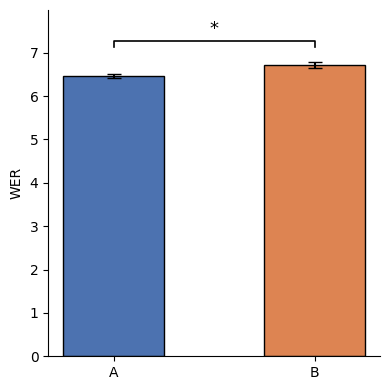

(-3.0375810907288696, 0.014072896958297554)

In [10]:
baseline_results_private = np.load("saved_data/private_scores_baseline_results.npy")*100
paired_t_test(main_results_private, baseline_results_private)

--- Paired T-Test Results ---
Mean A: 5.7691
Mean B: 6.3087
Mean difference (A - B): -0.5396
T-statistic:    -5.54657
P-value:        0.00036

Conclusion: The difference is statistically significant (Reject H0).
A is significantly better than B.


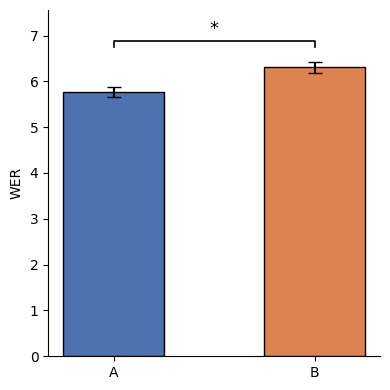

(-5.5465736705167, 0.000358004928480785)

In [11]:
baseline_results_public = np.load("saved_data/public_scores_baseline_results.npy")*100
paired_t_test(main_results_public, baseline_results_public)

In [6]:
val_scores = np.load("saved_data/val_scores.npy")

### Abalation #1: Calling LLM only once at the end of decoding

In [ ]:
llama_3b = np.load("/home/ebrahim/brainaudio/figure_data/b2t_25_results/saved_data/llama_3b.npy")*100
t, p = paired_t_test(no_delayed_fusion, val_scores)

--- Paired T-Test Results ---
Mean A: 8.3102
Mean B: 6.3566
Mean difference (A - B): 1.9536
T-statistic:    28.85842
P-value:        0.00000

Conclusion: The difference is statistically significant (Reject H0).
B is significantly better than A.


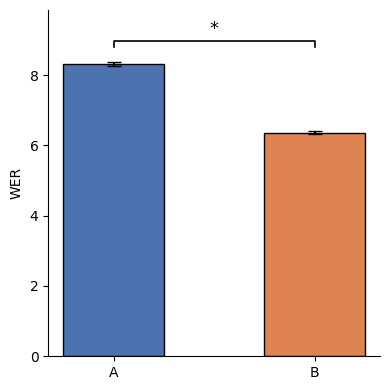

In [9]:
no_delayed_fusion = np.load("/home/ebrahim/brainaudio/figure_data/b2t_25_results/saved_data/no_delayed_fusion_ablation.npy")*100
t, p = paired_t_test(no_delayed_fusion, val_scores)

### Abalation #2: No LLM Fine-tuning

--- Paired T-Test Results ---
Mean A: 7.2620
Mean B: 6.3566
Mean difference (A - B): 0.9054
T-statistic:    22.60046
P-value:        0.00000

Conclusion: The difference is statistically significant (Reject H0).
B is significantly better than A.


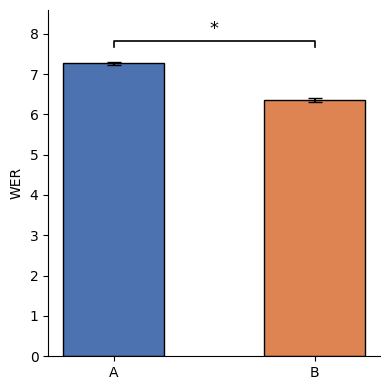

In [7]:
no_finetuning_variants = np.load("/home/ebrahim/brainaudio/figure_data/b2t_25_results/saved_data/no_finetuning_ablation.npy")*100
t, p = paired_t_test(no_finetuning_variants, val_scores)

### Abalation #3: No Phoneme Variants

--- Paired T-Test Results ---
Mean A: 6.3642
Mean B: 6.3566
Mean difference (A - B): 0.0076
T-statistic:    0.31784
P-value:        0.75786

Conclusion: The difference is NOT statistically significant (Fail to reject H0).


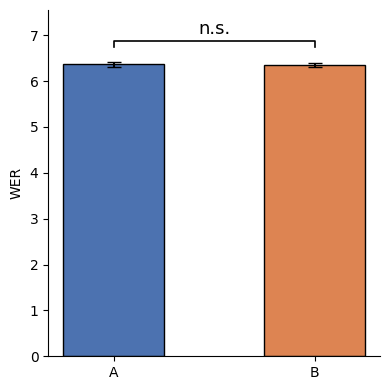

In [10]:
no_phoneme_variants = np.load("/home/ebrahim/brainaudio/figure_data/b2t_25_results/saved_data/no_variants_ablation.npy")*100
t, p =paired_t_test(no_phoneme_variants, val_scores)
